# Lecture 2
---
This is an example Jupyter notebook for some of the topics covered in lecture 2, part of the _"Data science tools and Machine Learning"_ track. See also the `data-science-tools.ipynb` notebook for a good overview of the available methods in `numpy`, `pandas`, and `matplotlib`.

## 1. Data handling
---

In [1]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Load iris dataset 
iris = datasets.load_iris()

In [3]:
# Show available properties of the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Show dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Show size of dataset
# The dataset has 150 observations and 4 features
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [6]:
# Show feature and target names
print("Feature names: {}".format(iris.feature_names))
print("Target names:  {}".format(iris.target_names))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


In [7]:
# Create pandas.DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Add new column(s) for target (type)
df['type']   = iris.target_names[iris.target]
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [9]:
# In cases with incomplete and/or corrupted data, it may be necessary to do some
# cleaning.
# -- Remove duplicates *if* you have reason to suspect that repeated, identical 
#    entries are pathological (they might not be)
# Drop duplicates and null values 
df = df.drop_duplicates().dropna()

# -- Remove rows with 'not-a-number' in the features
nan = np.any(np.isnan(df[iris.feature_names]), axis=1)
df  = df[~nan]

print ("Shape after cleaning: {}".format(df.shape))
df.head()

Shape after cleaning: (149, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
# Save to, and reload from, CSV file
df.to_csv("iris.csv")

# ...

df2 = pd.read_csv("iris.csv", index_col=0)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [11]:
# Get summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Access column two ways
df.type
df['type']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: type, Length: 149, dtype: object

In [13]:
# List subset of columns
df[['sepal width (cm)', 'petal width (cm)', 'type']].head(10)

,sepal width (cm),petal width (cm),type
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa
5,3.9,0.4,setosa
6,3.4,0.3,setosa
7,3.4,0.2,setosa
8,2.9,0.2,setosa
9,3.1,0.1,setosa


In [14]:
# List subset of rows by row number
df[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
12,4.8,3.0,1.4,0.1,setosa,0
13,4.3,3.0,1.1,0.1,setosa,0
14,5.8,4.0,1.2,0.2,setosa,0


In [15]:
# ... or, equivalently
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
11,4.8,3.4,1.6,0.2,setosa,0
12,4.8,3.0,1.4,0.1,setosa,0
13,4.3,3.0,1.1,0.1,setosa,0
14,5.8,4.0,1.2,0.2,setosa,0


In [43]:
# Sometimes, row number and index differ (e.g. when shuffling)
df = df.sample(frac=1, replace=False, random_state=1234)
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
23,5.1,3.3,1.7,0.5,setosa,0
87,6.3,2.3,4.4,1.3,versicolor,1
148,6.2,3.4,5.4,2.3,virginica,2
13,4.3,3.0,1.1,0.1,setosa,0
86,6.7,3.1,4.7,1.5,versicolor,1
9,4.9,3.1,1.5,0.1,setosa,0
61,5.9,3.0,4.2,1.5,versicolor,1
26,5.0,3.4,1.6,0.4,setosa,0
77,6.7,3.0,5.0,1.7,versicolor,1
149,5.9,3.0,5.1,1.8,virginica,2


In [44]:
# This illustrates the difference in accessing row by row number 
df.iloc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
96,5.7,2.9,4.2,1.3,versicolor,1
129,7.2,3.0,5.8,1.6,virginica,2
44,5.1,3.8,1.9,0.4,setosa,0
120,6.9,3.2,5.7,2.3,virginica,2
79,5.7,2.6,3.5,1.0,versicolor,1


In [45]:
# ... or by *index*
df.loc[10:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,target
10,5.4,3.7,1.5,0.2,setosa,0
75,6.6,3.0,4.4,1.4,versicolor,1
40,5.0,3.5,1.3,0.3,setosa,0
99,5.7,2.8,4.1,1.3,versicolor,1
122,7.7,2.8,6.7,2.0,virginica,2
...,...,...,...,...,...,...
59,5.2,2.7,3.9,1.4,versicolor,1
141,6.9,3.1,5.1,2.3,virginica,2
69,5.6,2.5,3.9,1.1,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1


In [46]:
# find the measurement with target > 0 and the type for these measurements. Find the unique such type
df.query('target  > 0').type.unique()

array(['versicolor', 'virginica'], dtype=object)

In [47]:
# Count number of rows in each class
df.groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,49,49,49,49,49


In [48]:
# Sort the rows (highest values -> ascending=False) by sepal length showing only the relevant columns (sepal width and petal lenght) and the first 2 rows
df.sort_values(by=['sepal length (cm)'], ascending=False)[['sepal width (cm)', 'petal length (cm)']].head(2)

,sepal width (cm),petal length (cm)
131,3.8,6.4
117,3.8,6.7


In [49]:
# Grop data by type and get the mean of sepal length for each group, and sort by descending value
df.groupby('type')['sepal length (cm)'].mean().sort_values(ascending=False)

type
virginica     6.604082
versicolor    5.936000
setosa        5.006000
Name: sepal length (cm), dtype: float64

In [50]:
# Select only events with sepal length greater than 6.0 and count them grouped by type
mask = df['sepal length (cm)'] > 6.0
df[mask].groupby('type').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,,,,,
versicolor,20,20,20,20,20
virginica,41,41,41,41,41


In [51]:
# Convert pandas.DataFrame to numpy.array
array = df['type'].values
array

array(['setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 

In [52]:
# Convert numpy.array to python list
array.tolist()

['setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'v

## 2.  Visualisation
---

/opt/anaconda3/envs/daml/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


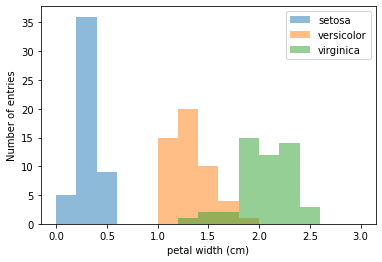

In [26]:
# Feature to plot
feat = 'petal width (cm)'

# Bin range
bins = np.linspace(0, 3, 15 + 1, endpoint=True)

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris.target_names:
    # Boolean mask
    mask = df['type'] == t
    
    # Make histogram for current type
    ax.hist(df[mask][feat], bins=bins, alpha=0.5, label=t)
    pass

# Decorations
ax.legend()
ax.set_xlabel(feat)
ax.set_ylabel("Number of entries")
fig.show()

/opt/anaconda3/envs/daml/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


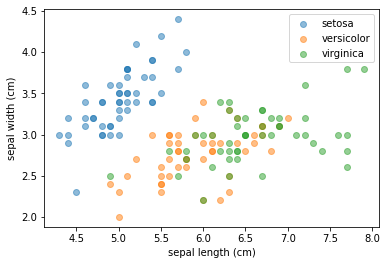

In [27]:
# Features to plot
featx = 'sepal length (cm)'
featy = 'sepal width (cm)'

# Create figure and axis objects.
fig, ax = plt.subplots()

for t in iris['target_names']:
    # Boolean mask
    mask = df['type'] == t

    # Scatter plot for current type
    ax.scatter(df[mask][featx], df[mask][featy], label=t, alpha=0.5)
    pass

# Draw legend
ax.legend()
ax.set_xlabel(featx)
ax.set_ylabel(featy)
fig.show()

/opt/anaconda3/envs/daml/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/daml/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/daml/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


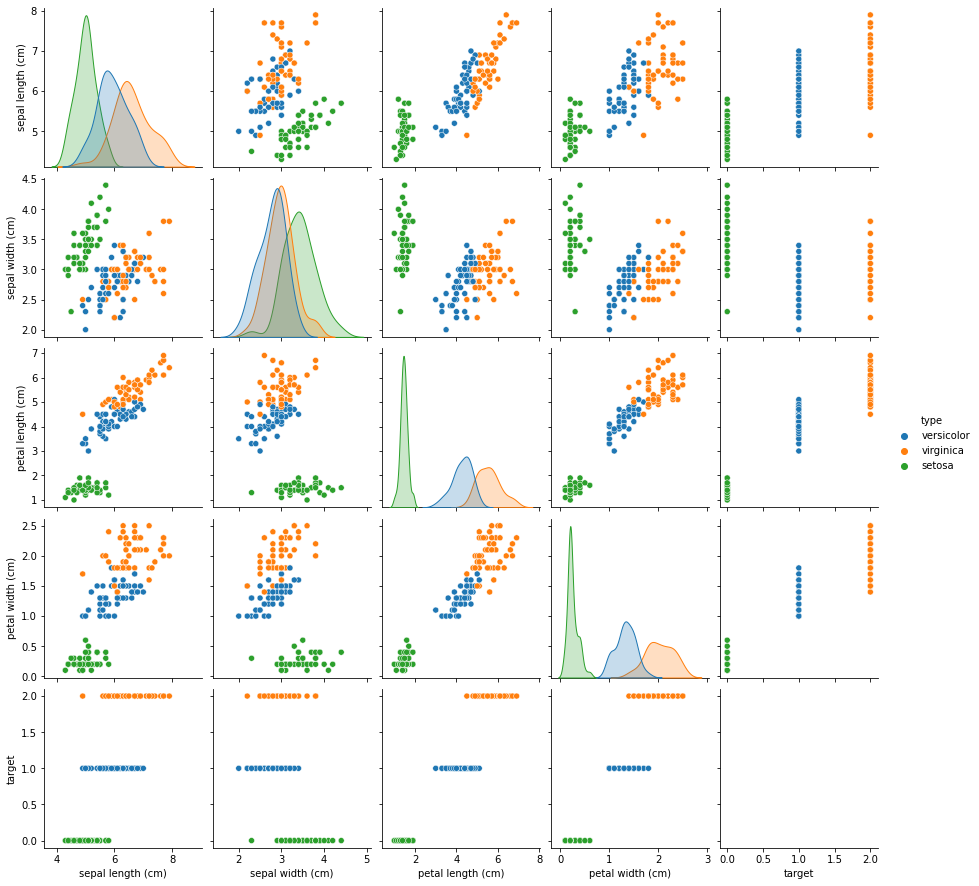

In [28]:
sns.pairplot(df, hue = 'type');

## 4. Decision Trees
---

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion

In [54]:
X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names, 
      "\npredict whether:", iris.target_names)

given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']


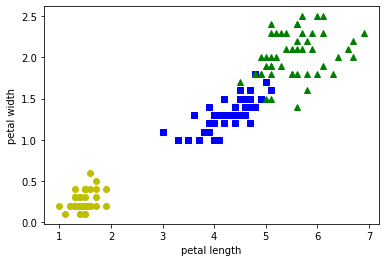

In [55]:
# use matplotlib as you did on previous labs
import matplotlib.pyplot as plt

color_map = ["yo", "bs", "g^"]
for target_index, target_name in enumerate(iris.target_names):
    plt.plot(X[:, 0][Y==target_index], # petal length on X axis (the ones that equal to target)
             X[:, 1][Y==target_index], # petal width on Y axis (the ones that equal to target)
             color_map[target_index], 
             label=target_name)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

#### Split of the Dataset

* Split the dataset into training and test set is fundamental. Usually the training set consists of 70% of data and the test set of 30%. (test_size option on the train_test_split function is used for the percentage of splitting).
* After the split, the train set (x_train) is used for the training of the algorithm.
* After the training, the test set (y_test) is used to predict the outcome of unseen data.
* The accuracy_score function is then used to give an estimate of the accuracy of the prediction.

In [56]:
# split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object with these parameters
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)
# Predict the response for test dataset
y_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [63]:
from sklearn.tree import export_graphviz
export_graphviz(dt,
                out_file="iris_tree.dot",
                rounded=True,
                filled=True,
                feature_names=iris.feature_names
               )


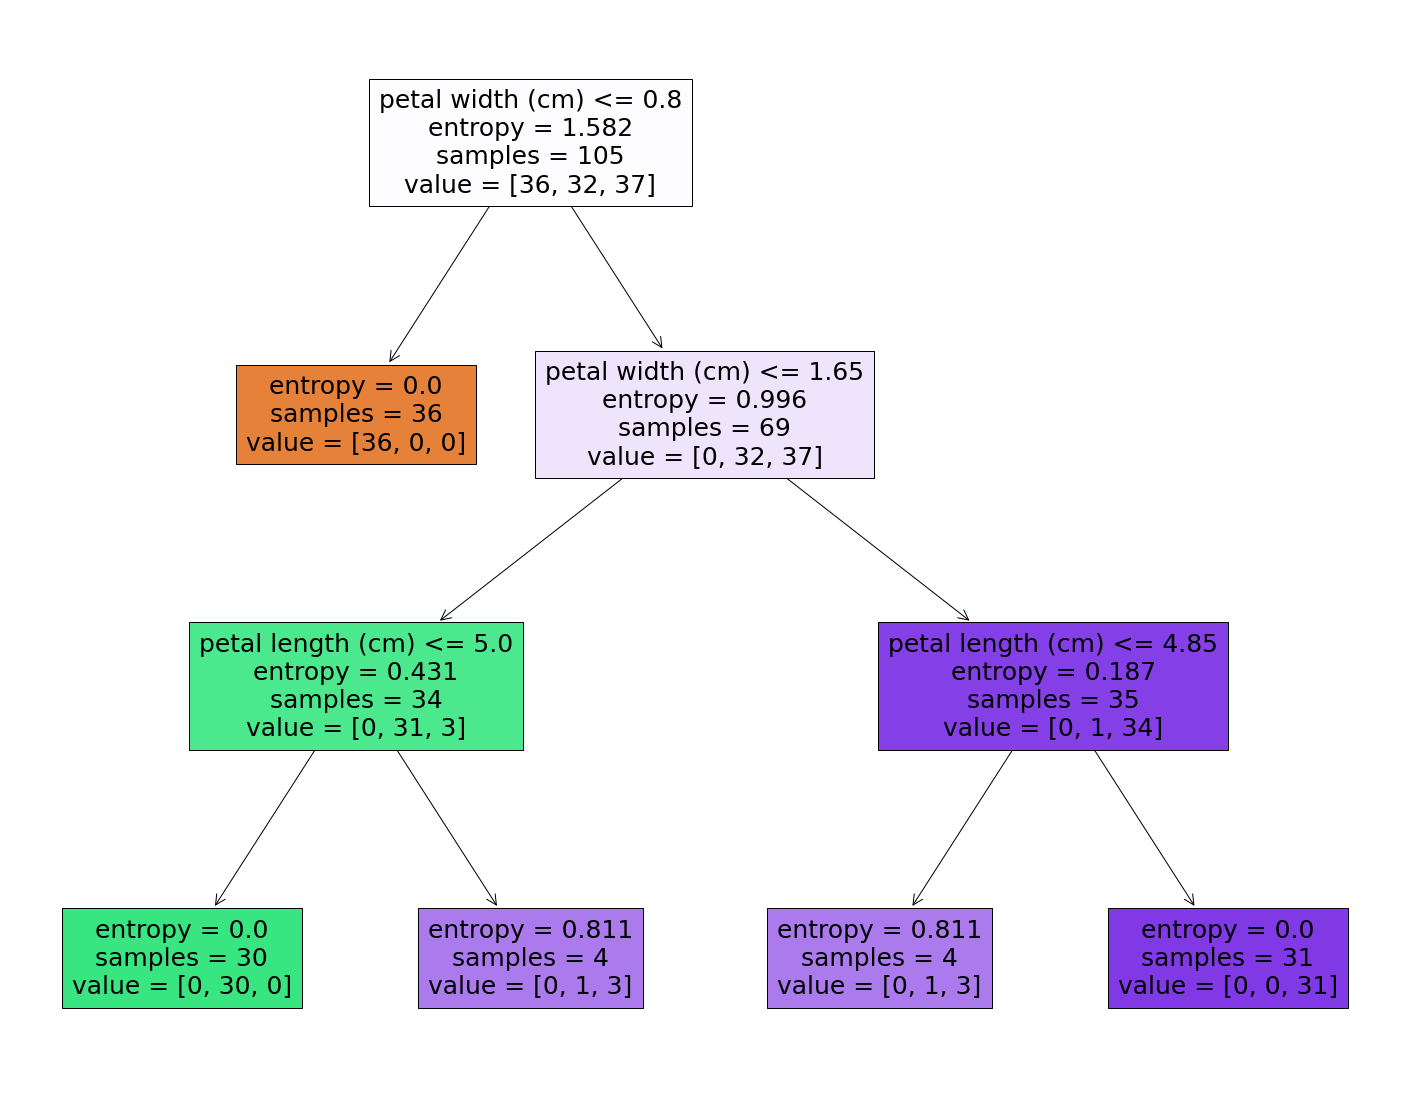

In [65]:
#save the decision_tree as png
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   filled=True,
                  feature_names=iris.feature_names)
fig.savefig("decision_tree.png")

# Ensamble methods

## Boosting: GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# here we use the Gradient boosting classifier
n_estimators = 20

bdt = GradientBoostingClassifier(max_depth=3, n_estimators=n_estimators)
bdt.fit(x_train, y_train)
y_pred = bdt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Bagging: Random forest

In [67]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=20, max_depth=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
